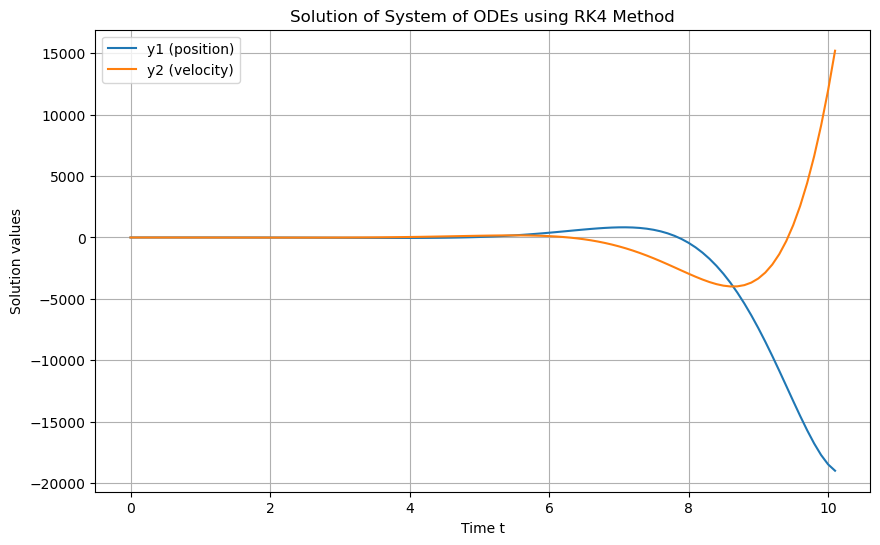

In [7]:
"""Segment 1 - RK4 Method Applied To generic system of n first order ODES """

import numpy as np
import matplotlib.pyplot as plt

# Define a system of ODEs
def f(t, y):
    """
    System of ODEs defined as dy/dt = f(t, y).
    
    Example system:
    dy1/dt = y2
    dy2/dt = -y1
    
    :param t: Time variable
    :param y: State vector [y1, y2, ..., yn]
    :return: Derivative vector [dy1/dt, dy2/dt, ..., dyn/dt]
    """
    dydt = np.zeros_like(y)
    dydt[0] = y[0] + y[1]  # dy1/dt = y2
    dydt[1] = -y[0] + y[1]  # dy2/dt = -y1
    return dydt

# RK4 Method for Systems of ODEs
def rk4_system(f, t0, y0, t_end, h):
    """
    Solve a system of ODEs using the 4th-order Runge-Kutta method (RK4).
    
    :param f: Function defining the system of ODEs, f(t, y)
    :param t0: Initial time
    :param y0: Initial state vector
    :param t_end: End time
    :param h: Time step
    :return: Arrays of time points and solution vectors
    """
    t_values = [t0]
    y_values = [y0]

    t = t0
    y = y0

    while t < t_end:
        # Compute intermediate slopes (k1, k2, k3, k4)
        m1 = f(t, y)
        m2 = f(t + h / 2, y + h / 2 * m1)
        m3 = f(t + h / 2, y + h / 2 * m2)
        m4 = f(t + h, y + h * m3)

        # Compute average slope (m_avg)
        m_avg = (m1 + 2 * m2 + 2 * m3 + m4) / 6

        # Update state vector and time
        y = y + h * m_avg
        t = t + h

        # Store results
        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)

# Main Program
if __name__ == "__main__":
    # Initial conditions and parameters
    t0 = 0.0
    t_end = 10.0
    h = 0.1
    y0 = np.array([1.0, 0.0])  # Initial values [y1(0), y2(0)]

    # Solve the system
    t_values, y_values = rk4_system(f, t0, y0, t_end, h)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_values[:, 0], label="y1 (position)")
    plt.plot(t_values, y_values[:, 1], label="y2 (velocity)")
    plt.title("Solution of System of ODEs using RK4 Method")
    plt.xlabel("Time t")
    plt.ylabel("Solution values")
    plt.legend()
    plt.grid()
    plt.show()


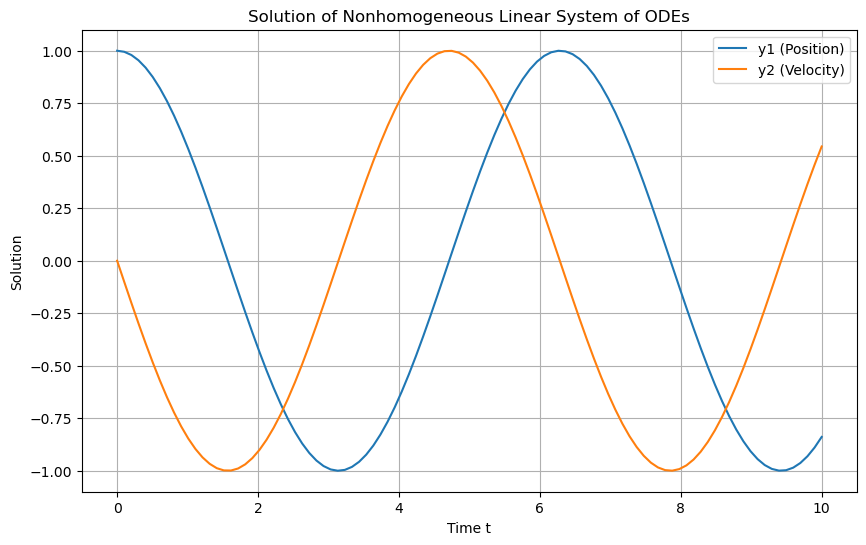

In [19]:
""" Segment 2 - Systems of ODES Linear """

""" dy/dt = Ay + b(t) """

import numpy as np
from scipy.linalg import expm, eig, inv
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the matrix A from system of ODES
A = np.array([[0, 1], 
              [-1, 0]])  # Example: Harmonic oscillator matrix

# Define the forcing term b(t)
def b(t):
    return np.array([np.sin(t), np.cos(t)])  # Example: Forcing function


# Define the initial condition y0
y0 = np.array([1, 0])  # Initial state vector

# Define the time points
t_values = np.linspace(0, 10, 100)  # Time range

# Function to compute e^At explicitly
def compute_e_At(A, t):
    """
    Compute the matrix exponential e^(A * t) using eigen decomposition.
    
    :param A: Matrix A
    :param t: Time t
    :return: Matrix e^(A * t)
    """
    # Eigen decomposition
    eigenvalues, eigenvectors = eig(A)
    
    # Construct P and Delta
    P = eigenvectors
    P_inv = inv(P)
    Delta = np.diag(eigenvalues)
    
    # Compute e^(Delta * t)
    exp_Delta_t = np.diag(np.exp(eigenvalues * t))
    
    # Reconstruct e^(A * t)
    e_At = P @ exp_Delta_t @ P_inv
    return e_At

# Compute the particular solution integral
def particular_solution_integral(A, b, t):
    """
    Compute the integral for the particular solution using variation of parameters:
    y_p(t) = e^(A * t) * ∫[0 to t] e^(-A * τ) * b(τ) dτ
    
    :param A: Coefficient matrix
    :param b: Forcing function b(t)
    :param t: Current time
    :return: Particular solution vector at time t
    """
    def integrand(tau):
        e_At_inv = expm(-A * tau)
        return e_At_inv @ b(tau)
    
    # Perform the integral component-wise
    integral = np.zeros(len(b(0)))
    for i in range(len(b(0))):
        integral[i] = quad(lambda tau: integrand(tau)[i], 0, t)[0]
    
    return compute_e_At(A, t) @ integral

# Solve the system
def solve_nonhomogeneous_linear_system(A, b, y0, t_values):
    """
    Solve the system dy/dt = A * y(t) + b(t).
    
    :param A: Matrix A
    :param b: Forcing function b(t)
    :param y0: Initial state vector
    :param t_values: Array of time points
    :return: Solution array y(t) for all t in t_values
    """
    solutions = []
    for t in t_values:
        # Homogeneous solution
        e_At = compute_e_At(A, t)
        y_h = e_At @ y0
        
        # Particular solution
        y_p = particular_solution_integral(A, b, t)
        
        # Total solution
        y_t = y_h + y_p
        solutions.append(y_t)
    return np.array(solutions)

# Solve the system
y_total = solve_nonhomogeneous_linear_system(A, b, y0, t_values)

# Plot the solutions
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_total[:, 0], label="y1 (Position)")
plt.plot(t_values, y_total[:, 1], label="y2 (Velocity)")
plt.title("Solution of Nonhomogeneous Linear System of ODEs")
plt.xlabel("Time t")
plt.ylabel("Solution")
plt.legend()
plt.grid()
plt.show()


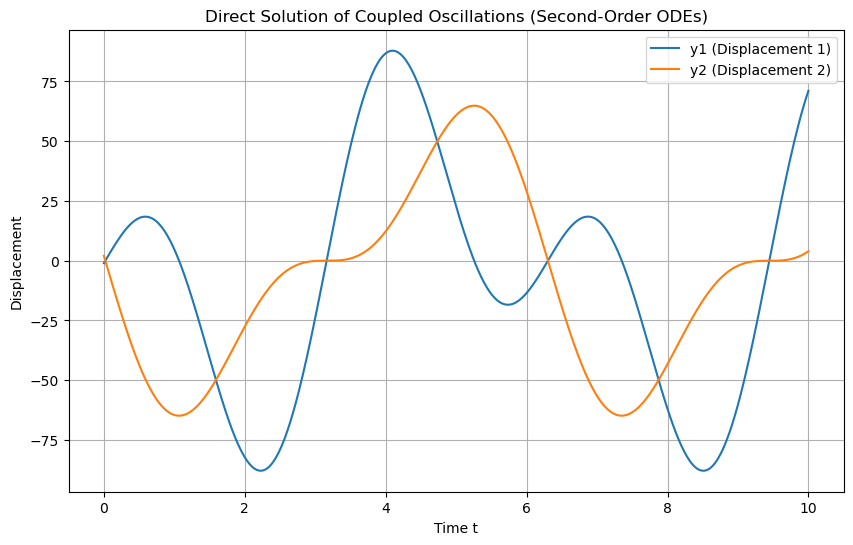

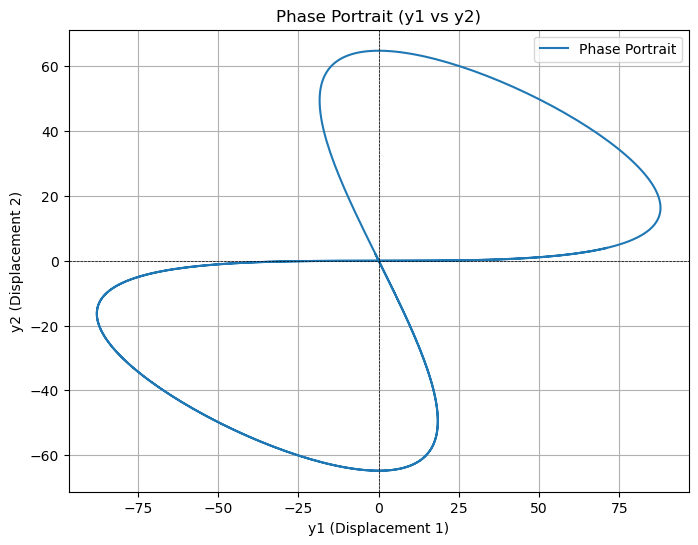

In [27]:
""" Segment 3 - Direct Solution of Second-Order ODEs """

import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A from the second-order system
# Example: Coupled oscillators

M =  np.array([[1, 0], 
               [0, 2]])

K = np.array([ [-3, 2], 
               [2, -4]])

inverse_M = np.linalg.inv(M)

A = inverse_M @ K

# Define the initial conditions for y and dy/dt
y0 = np.array([-1.0, 2.0])  # Initial displacement
v0 = np.array([-3.0, 3.0])  # Initial velocity

# Time range and step size
t_start = 0
t_end = 10
n_steps = 500
t_values = np.linspace(t_start, t_end, n_steps)
dt = t_values[1] - t_values[0]

# Initialize arrays for y and dy/dt
y = np.zeros((len(A), n_steps))
v = np.zeros((len(A), n_steps))

# Set initial conditions
y[:, 0] = y0
v[:, 0] = v0

# Direct integration using finite difference method
for i in range(1, n_steps - 1):
    # Use central difference for acceleration: d^2y/dt^2 = A * y
    a = A @ y[:, i]  # Compute acceleration
    y[:, i + 1] = 2 * y[:, i] - y[:, i - 1] + dt**2 * a  # Update position

# Plot the solutions
plt.figure(figsize=(10, 6))
for i in range(len(A)):
    plt.plot(t_values, y[i, :], label=f"y{i+1} (Displacement {i+1})")
plt.title("Direct Solution of Coupled Oscillations (Second-Order ODEs)")
plt.xlabel("Time t")
plt.ylabel("Displacement")
plt.legend()
plt.grid()
plt.show()

#Phase Portrait Analysis
# Construct the phase portrait given explicit or numerical solutions for curves/coordinates
plt.figure(figsize=(8, 6))
plt.plot(y[0, :], y[1, :], label="Phase Portrait")
plt.title("Phase Portrait (y1 vs y2)")
plt.xlabel("y1 (Displacement 1)")
plt.ylabel("y2 (Displacement 2)")
plt.grid()
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.axvline(0, color='black', linewidth=0.5, linestyle="--")
plt.legend()
plt.show()


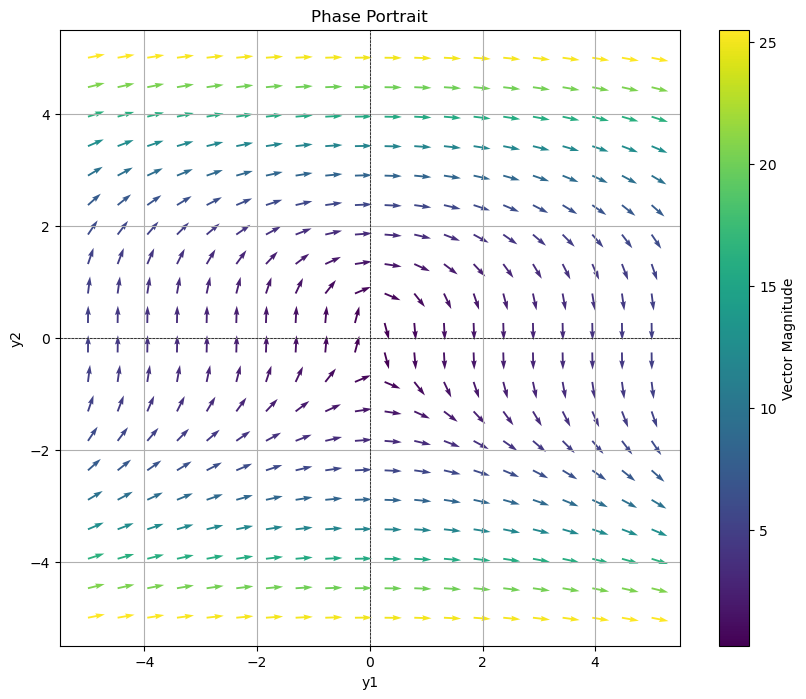

In [37]:
""" Segment 4 Phase Portrait Analysis Basic First Order Systems """


import numpy as np
import matplotlib.pyplot as plt

# Define the functions f and g (system of first-order ODEs)
def f(y1, y2, t=0):
    return y2**2  # Example: dy1/dt = y2

def g(y1, y2, t=0):
    return -y1  # Example: dy2/dt = -y1 - 0.1*y2 (damped harmonic oscillator)

# Generate the grid of points in phase space
y1_values = np.linspace(-5, 5, 20)  # Range for y1
y2_values = np.linspace(-5, 5, 20)  # Range for y2
Y1, Y2 = np.meshgrid(y1_values, y2_values)  # Create a mesh grid

# Compute the vector field components
F = f(Y1, Y2)  # f(y1, y2)
G = g(Y1, Y2)  # g(y1, y2)

# Normalize the vector field for consistent arrow lengths
magnitude = np.sqrt(F**2 + G**2)
F_normalized = F / magnitude
G_normalized = G / magnitude

# Plot the phase portrait
plt.figure(figsize=(10, 8))
plt.quiver(Y1, Y2, F_normalized, G_normalized, magnitude, cmap="viridis")
plt.title("Phase Portrait")
plt.xlabel("y1")
plt.ylabel("y2")
plt.grid()
plt.colorbar(label="Vector Magnitude")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.show()
